In [44]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

In [45]:
# Step 1: Create and populate the database
conn = sqlite3.connect("sales_data.db")
cursor = conn.cursor()
cursor.execute("""
CREATE TABLE IF NOT EXISTS sales (
    id INTEGER PRIMARY KEY AUTOINCREMENT,
    product TEXT,
    quantity INTEGER,
    price REAL
)
""")
sales_data = [
    ("Apple", 10, 1.5),
    ("Banana", 20, 0.8),
    ("Apple", 15, 1.5),
    ("Orange", 30, 1.2),
    ("Banana", 5, 0.8),
    ("Orange", 10, 1.2)
]
cursor.executemany("INSERT INTO sales (product, quantity, price) VALUES (?, ?, ?)", sales_data)
conn.commit()

In [46]:
# Step 2: Query and load data
query1 = """
SELECT product,
       SUM(quantity) AS total_qty,
       SUM(quantity * price) AS revenue
FROM sales
GROUP BY product
"""
df1 = pd.read_sql_query(query1, conn)
print(df1)

  product  total_qty  revenue
0   Apple        225    337.5
1  Banana        225    180.0
2  Orange        360    432.0


In [47]:
query2 = """
SELECT
    SUM(quantity) AS total_quantity_sold,
    SUM(quantity * price) AS total_revenue
FROM sales
"""
df2 = pd.read_sql_query(query2, conn)
print("Overall Sales Summary:")
print(df2)

Overall Sales Summary:
   total_quantity_sold  total_revenue
0                  810          949.5


In [48]:
query3 = """
SELECT product, SUM(quantity) AS total_qty
FROM sales
GROUP BY product
ORDER BY total_qty DESC
LIMIT 1
"""
df3 = pd.read_sql_query(query3, conn)
conn.close()
print("Best-Selling Product (by Quantity):")
print(df3)

Best-Selling Product (by Quantity):
  product  total_qty
0  Orange        360


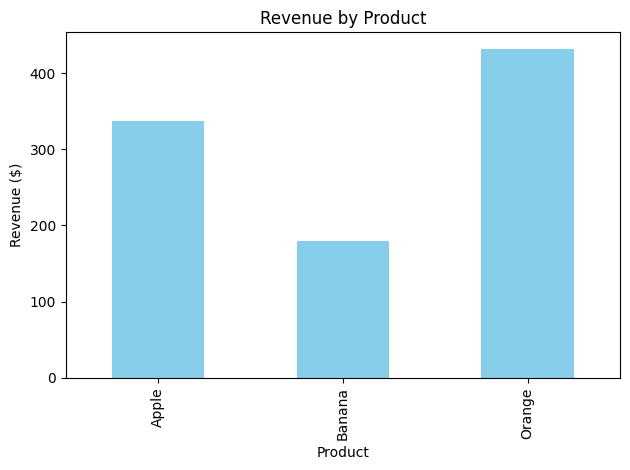

In [54]:
# Step 3: Plotting
df1.plot(kind='bar', x='product', y='revenue', legend=False, color='skyblue')
plt.title("Revenue by Product")
plt.ylabel("Revenue ($)")
plt.xlabel("Product")
plt.tight_layout()
plt.savefig("sales_chart.png")
plt.show()